In [ ]:
from nal.truth import TruthValue
from object.layer import Layer, visualize_layers, Link
from tqdm import tqdm

In [2]:
tv1 = TruthValue(1.0, 0.5)
tv2 = TruthValue(0.0, 0.5)
tv1.revise(tv2)
print(tv1)

(0.50;0.67)


In [3]:
layer1 = Layer(28*28)
layer_out = Layer(10)

layer1.fully_connect(layer_out)
layers = [layer1, layer_out]
def clean_layers(layers: list[Layer]):
    for layer in layers:
        layer.clean()

In [4]:
# randomly initialize the weights
import numpy as np
fs = np.random.rand(28*28, 10)
cs = np.random.rand(28*28, 10)*0.3
weights_1_out = np.array((fs, cs)).transpose(1, 2, 0)
print(weights_1_out.shape)
layer1.set_weights(weights_1_out)

(784, 10, 2)


In [5]:
import torch
import torchvision

import torchvision.transforms as transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor()])

# Download and load the training data
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# Print the size of the training and test datasets
print(f'Training dataset size: {len(trainset)}')
print(f'Test dataset size: {len(testset)}')

Training dataset size: 60000
Test dataset size: 10000


In [6]:
# Get the first batch of images and labels
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Get the first image and its label
first_image = images[0]
first_label = labels[0]

print(first_image.shape)
print(first_label)

torch.Size([1, 28, 28])
tensor(7)


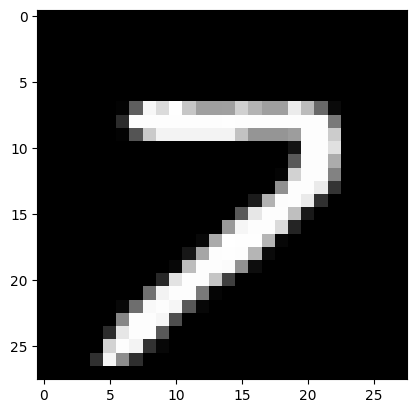

In [7]:
import matplotlib.pyplot as plt

plt.imshow(first_image.numpy().squeeze(), cmap='gray')

In [8]:
first_image.view(-1).numpy().shape

(784,)

In [9]:
values = [(v, 0.9) for v in first_image.view(-1).numpy()]

In [10]:
first_label

tensor(7)

In [11]:
label = [(1.0, 0.99) if i == first_label else (0.0, 0.99) for i in range(10)]
print(label)

[(0.0, 0.99), (0.0, 0.99), (0.0, 0.99), (0.0, 0.99), (0.0, 0.99), (0.0, 0.99), (0.0, 0.99), (1.0, 0.99), (0.0, 0.99), (0.0, 0.99)]


In [12]:
def test():
    cnt_correct = 0
    cnt_total = 0
    testiter = iter(testloader)
    images, labels = next(testiter)
    for image, label in zip(images, labels):
        values = [(v, 0.9) for v in image.view(-1).numpy()]
        clean_layers(layers)
        layer1.input(values)
        layer1.forward()
        truthv_out = [node.truth_value.e for node in layer_out.nodes]
        pred = np.argmax(truthv_out)
        if pred == label:
            cnt_correct += 1
        cnt_total += 1
    return cnt_correct / cnt_total

In [13]:
total = 50
acc_all = []
for i, (images, labels) in tqdm(enumerate(trainloader), total=total):
    acc = test()
    acc_all.append(acc)
    print(f'iter {i}: acc: {acc}')
    for image, label in zip(images, labels):
        values = [(v, 0.9) for v in image.view(-1).numpy()]
        label = [(1.0, 0.99) if i == label else (0.0, 0.99) for i in range(10)]
        clean_layers(layers)
        layer1.input(values)
        layer1.forward()
        # truthv_out = [node.truth_value.e for node in layer_out.nodes]
        layer_out.input_back(label)
        layer_out.backprop()
        # print(truthv_out)
    if i > total:
        break
acc = test()
acc_all.append(acc)

  0%|          | 0/50 [00:00<?, ?it/s]

iter 0: acc: 0.046875


  2%|▏         | 1/50 [00:06<04:57,  6.07s/it]

iter 1: acc: 0.625


  4%|▍         | 2/50 [00:12<04:51,  6.06s/it]

iter 2: acc: 0.703125


  6%|▌         | 3/50 [00:18<04:53,  6.24s/it]

iter 3: acc: 0.59375


  8%|▊         | 4/50 [00:25<04:50,  6.32s/it]

iter 4: acc: 0.625


 10%|█         | 5/50 [00:31<04:46,  6.36s/it]

iter 5: acc: 0.71875


 12%|█▏        | 6/50 [00:37<04:41,  6.40s/it]

iter 6: acc: 0.6875


 14%|█▍        | 7/50 [00:44<04:35,  6.41s/it]

iter 7: acc: 0.640625


 16%|█▌        | 8/50 [00:50<04:29,  6.41s/it]

iter 8: acc: 0.71875


 18%|█▊        | 9/50 [00:56<04:19,  6.34s/it]

iter 9: acc: 0.828125


 20%|██        | 10/50 [01:03<04:10,  6.25s/it]

iter 10: acc: 0.71875


 22%|██▏       | 11/50 [01:09<04:01,  6.19s/it]

iter 11: acc: 0.71875


 24%|██▍       | 12/50 [01:15<03:52,  6.13s/it]

iter 12: acc: 0.75


 26%|██▌       | 13/50 [01:21<03:48,  6.18s/it]

iter 13: acc: 0.796875


 28%|██▊       | 14/50 [01:27<03:45,  6.25s/it]

iter 14: acc: 0.78125


 30%|███       | 15/50 [01:34<03:39,  6.28s/it]

iter 15: acc: 0.875


 32%|███▏      | 16/50 [01:40<03:33,  6.27s/it]

iter 16: acc: 0.75


 34%|███▍      | 17/50 [01:46<03:26,  6.25s/it]

iter 17: acc: 0.640625


 36%|███▌      | 18/50 [01:52<03:20,  6.27s/it]

iter 18: acc: 0.765625


 38%|███▊      | 19/50 [01:59<03:14,  6.29s/it]

iter 19: acc: 0.734375


 40%|████      | 20/50 [02:05<03:09,  6.32s/it]

iter 20: acc: 0.734375


 42%|████▏     | 21/50 [02:11<03:03,  6.32s/it]

iter 21: acc: 0.90625


 44%|████▍     | 22/50 [02:18<02:56,  6.32s/it]

iter 22: acc: 0.75


 46%|████▌     | 23/50 [02:24<02:50,  6.32s/it]

iter 23: acc: 0.71875


 48%|████▊     | 24/50 [02:30<02:44,  6.33s/it]

iter 24: acc: 0.84375


 50%|█████     | 25/50 [02:37<02:38,  6.32s/it]

iter 25: acc: 0.765625


 52%|█████▏    | 26/50 [02:43<02:31,  6.32s/it]

iter 26: acc: 0.75


 54%|█████▍    | 27/50 [02:49<02:25,  6.32s/it]

iter 27: acc: 0.796875


 56%|█████▌    | 28/50 [02:56<02:19,  6.33s/it]

iter 28: acc: 0.765625


 58%|█████▊    | 29/50 [03:02<02:13,  6.34s/it]

iter 29: acc: 0.703125


 60%|██████    | 30/50 [03:08<02:06,  6.35s/it]

iter 30: acc: 0.796875


 62%|██████▏   | 31/50 [03:15<02:00,  6.36s/it]

iter 31: acc: 0.78125


 64%|██████▍   | 32/50 [03:21<01:54,  6.36s/it]

iter 32: acc: 0.75


 66%|██████▌   | 33/50 [03:27<01:47,  6.35s/it]

iter 33: acc: 0.8125


 68%|██████▊   | 34/50 [03:34<01:41,  6.37s/it]

iter 34: acc: 0.765625


 70%|███████   | 35/50 [03:40<01:34,  6.29s/it]

iter 35: acc: 0.75


 72%|███████▏  | 36/50 [03:46<01:27,  6.25s/it]

iter 36: acc: 0.828125


 74%|███████▍  | 37/50 [03:52<01:20,  6.20s/it]

iter 37: acc: 0.8125


 76%|███████▌  | 38/50 [03:58<01:14,  6.18s/it]

iter 38: acc: 0.78125


 78%|███████▊  | 39/50 [04:05<01:08,  6.23s/it]

iter 39: acc: 0.78125


 80%|████████  | 40/50 [04:11<01:03,  6.31s/it]

iter 40: acc: 0.78125


 82%|████████▏ | 41/50 [04:18<00:57,  6.35s/it]

iter 41: acc: 0.78125


 84%|████████▍ | 42/50 [04:24<00:50,  6.36s/it]

iter 42: acc: 0.78125


 86%|████████▌ | 43/50 [04:30<00:44,  6.38s/it]

iter 43: acc: 0.734375


 88%|████████▊ | 44/50 [04:37<00:38,  6.37s/it]

iter 44: acc: 0.734375


 90%|█████████ | 45/50 [04:43<00:31,  6.36s/it]

iter 45: acc: 0.78125


 92%|█████████▏| 46/50 [04:49<00:25,  6.33s/it]

iter 46: acc: 0.828125


 94%|█████████▍| 47/50 [04:56<00:18,  6.27s/it]

iter 47: acc: 0.71875


 96%|█████████▌| 48/50 [05:02<00:12,  6.30s/it]

iter 48: acc: 0.8125


 98%|█████████▊| 49/50 [05:08<00:06,  6.31s/it]

iter 49: acc: 0.859375


100%|██████████| 50/50 [05:15<00:00,  6.31s/it]

iter 50: acc: 0.8125


51it [05:21,  6.27s/it]                        

iter 51: acc: 0.8125


51it [05:27,  6.42s/it]


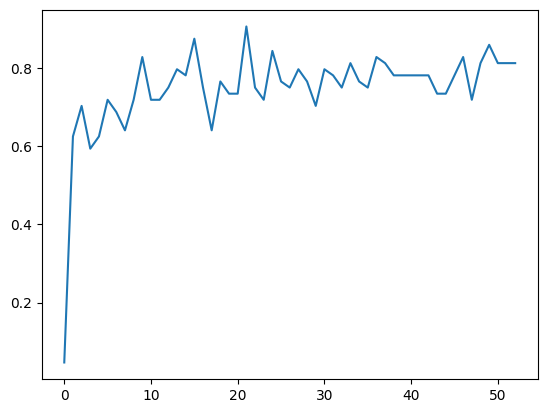

In [15]:
plt.plot(acc_all)

In [16]:
[node.truth_value.e for node in layer_out.nodes]


[0.2714070232111767,
 0.16769383218888417,
 0.2151269796489974,
 0.2735513618929075,
 0.16223006529821604,
 0.2321975547565151,
 0.16975388419380488,
 0.22885346926114486,
 0.2560114673091203,
 0.2111595032883261]

In [18]:
tvs_all = []
for node in layer_out.nodes:
    tvs = []
    link: Link
    for link in node.lower_links:
        # tvs.append((link.truth_value.f, link.truth_value.c))
        tvs.append(link.truth_value.e)
    tvs_all.append(tvs)


In [19]:
tvs_all = np.array(tvs_all)

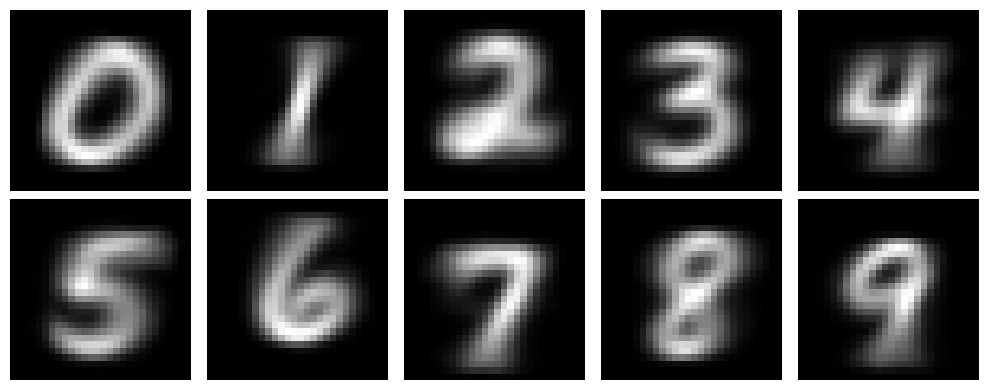

In [25]:
tvs_all = tvs_all.reshape(10, 28, 28)
import matplotlib.pyplot as plt

# 显示这 10 张图片
fig, axes = plt.subplots(2, 5, figsize=(10, 4))  # 创建2行5列的子图
axes = axes.flatten()

for i in range(10):
    axes[i].imshow(tvs_all[i], cmap='gray')  # 显示灰度图
    axes[i].axis('off')  # 关闭坐标轴

plt.tight_layout()
plt.show()


In [29]:
tvs_all[0].max()

0.7970572229783506